In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm


In [2]:
df = pd.read_csv(r'D:\1\ALY6150\3\EMR_sample_2022-1.csv')
df.head(5)

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Length_of_stay
0,1,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         318438 non-null  int64  
 1   case_id                            318438 non-null  int64  
 2   Hospital_code                      318438 non-null  int64  
 3   Hospital_type_code                 318438 non-null  object 
 4   City_Code_Hospital                 318438 non-null  int64  
 5   Hospital_region_code               318438 non-null  object 
 6   Available Extra Rooms in Hospital  318438 non-null  int64  
 7   Department                         318438 non-null  object 
 8   Ward_Type                          318438 non-null  object 
 9   Ward_Facility_Code                 318438 non-null  object 
 10  Bed Grade                          318325 non-null  float64
 11  patientid                          3184

In [4]:
df=df.dropna(axis=0, how='any')   #delete NaN values
df.reset_index(drop=True, inplace=True)    # reset index

In [5]:
important_vars = df[['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient','Age', 'Admission_Deposit','Length_of_stay']]
important_vars.describe(include='all')

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Age,Admission_Deposit,Length_of_stay
count,313793.000000,313793.000000,313793.000000,313793,313793.000000,313793
unique,NaN,NaN,NaN,10,NaN,11
top,NaN,NaN,NaN,31-40,NaN,21-30
freq,NaN,NaN,NaN,62760,NaN,86316
mean,3.196419,2.622952,3.280857,NaN,4881.893165,NaN
std,1.167924,0.872618,1.761758,NaN,1086.243945,NaN
min,0.000000,1.000000,0.000000,NaN,1800.000000,NaN
25%,2.000000,2.000000,2.000000,NaN,4188.000000,NaN
50%,3.000000,3.000000,3.000000,NaN,4742.000000,NaN
75%,4.000000,3.000000,4.000000,NaN,5410.000000,NaN


In [6]:
# Create a new binary column for whether the severity of illness is 'Extreme' or not
df['is_extreme'] = (df['Severity of Illness'] == 'Extreme').astype(int)

# Use pandas' get_dummies function to convert the 'Age' column into dummy/indicator variables
age_dummies = pd.get_dummies(df['Age']) 
# Now drop the '21-30' column to use it as the base
age_dummies = age_dummies.drop('21-30', axis=1)

# Define your logistic regression model
logistic_model66 = LogisticRegression()

# Fit your model
logistic_model66.fit(age_dummies, df['is_extreme'])

# Get the coefficients (betas)
coefficients = logistic_model66.coef_

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)

# Print out the odds ratios for each age category relative to '21-30'
for category, odds_ratio in zip(age_dummies.columns, odds_ratios[0]):
    print(f"Odds Ratio of {category} relative to '21-30': {odds_ratio}")

Odds Ratio of 0-10 relative to '21-30': 0.9975840035592646
Odds Ratio of 11-20 relative to '21-30': 0.7581739766618053
Odds Ratio of 31-40 relative to '21-30': 1.6391548190096028
Odds Ratio of 41-50 relative to '21-30': 2.292993203772484
Odds Ratio of 51-60 relative to '21-30': 2.3648492971120176
Odds Ratio of 61-70 relative to '21-30': 2.331846291206434
Odds Ratio of 71-80 relative to '21-30': 2.1041430305171884
Odds Ratio of 81-90 relative to '21-30': 2.608138273814407
Odds Ratio of 91-100 relative to '21-30': 2.5138768410718346


In [7]:
age_dummies = sm.add_constant(age_dummies)

# Define your logistic regression model
logit_model = sm.Logit(df['is_extreme'], age_dummies)

# Fit your model
result = logit_model.fit()

print(result.summary())

# Get the marginal effects
marg_eff = result.get_margeff()
print(marg_eff.summary())

Optimization terminated successfully.
         Current function value: 0.461620
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:               313793
Model:                          Logit   Df Residuals:                   313783
Method:                           MLE   Df Model:                            9
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                 0.01635
Time:                        21:02:04   Log-Likelihood:            -1.4485e+05
converged:                       True   LL-Null:                   -1.4726e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1488      0.016   -131.882      0.000      -2.181      -2.117
0-10          -0.0008      0.

In [8]:
# Define your confounding variables
confounders = df[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit', 'Hospital_code', 'City_Code_Hospital']]

# Combine your predictor variables with your confounding variables
X_con = pd.concat([age_dummies, confounders], axis=1)

# Define your logistic regression model
logistic_model77 = LogisticRegression()

# Fit your model
logistic_model77.fit(X_con, df['is_extreme'])

# Get the coefficients (betas)
coefficients_con = logistic_model77.coef_

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients_con)

# Get the list of age categories from your dummy variables
age_categories = age_dummies.columns

# Print out the odds ratios for each age category relative to '21-30'
for category, odds_ratio in zip(X_con.columns, odds_ratios[0]):
    if category in age_categories:  # only print the odds ratio if the category is an age category
        print(f"Odds Ratio of {category} relative to '21-30': {odds_ratio}")


Odds Ratio of const relative to '21-30': 0.9999999294278605
Odds Ratio of 0-10 relative to '21-30': 0.99999999611123
Odds Ratio of 11-20 relative to '21-30': 0.9999999875354796
Odds Ratio of 31-40 relative to '21-30': 0.9999999788348726
Odds Ratio of 41-50 relative to '21-30': 0.9999999964136354
Odds Ratio of 51-60 relative to '21-30': 0.9999999994194856
Odds Ratio of 61-70 relative to '21-30': 0.9999999997011807
Odds Ratio of 71-80 relative to '21-30': 0.9999999964982632
Odds Ratio of 81-90 relative to '21-30': 1.0000000006800116
Odds Ratio of 91-100 relative to '21-30': 1.0000000000695135


In [9]:
# Add a constant to the features matrix
X_con_const = sm.add_constant(X_con)

# Fit a logistic regression model
logit_con = sm.Logit(df['is_extreme'], X_con_const)
result_con = logit_con.fit()

# Compute the marginal effects
marginal_effects_con = result_con.get_margeff()

print(marginal_effects_con.summary())


Optimization terminated successfully.
         Current function value: 0.459289
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:             is_extreme
Method:                          dydx
At:                           overall
                                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
0-10                                 -0.0012      0.006     -0.180      0.857      -0.014       0.011
11-20                                -0.0393      0.005     -8.299      0.000      -0.049      -0.030
31-40                                 0.0705      0.003     24.986      0.000       0.065       0.076
41-50                                 0.1171      0.003     42.762      0.000       0.112       0.122
51-60                                 0.1211      0.003     42.344      0.000       0.115       0.127
61-70                           

In [10]:
# Create a copy of the dataframe
df_copy = df.copy()

# One-hot encode the categorical features
categorical_features = ['Hospital_type_code', 'City_Code_Hospital','Age', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Length_of_stay']
df_copy = pd.get_dummies(df_copy, columns=categorical_features)

# Display the updated dataframe
df_copy.head()

,Unnamed: 0,case_id,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Admission_Deposit,...,Length_of_stay_11-20,Length_of_stay_21-30,Length_of_stay_31-40,Length_of_stay_41-50,Length_of_stay_51-60,Length_of_stay_61-70,Length_of_stay_71-80,Length_of_stay_81-90,Length_of_stay_91-100,Length_of_stay_More than 100 Days
0,1,1,8,3,2.0,31397,7.0,Extreme,2,4911,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2.0,31397,7.0,Extreme,2,5954,...,0,0,0,1,0,0,0,0,0,0
2,3,3,10,2,2.0,31397,7.0,Extreme,2,4745,...,0,0,1,0,0,0,0,0,0,0
3,4,4,26,2,2.0,31397,7.0,Extreme,2,7272,...,0,0,0,1,0,0,0,0,0,0
4,5,5,26,2,2.0,31397,7.0,Extreme,2,5558,...,0,0,0,1,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Prepare the feature matrix X and target vector y
X1 = df_copy.drop(columns=['Severity of Illness','is_extreme','Unnamed: 0', 'case_id','patientid'])
y1 = df_copy['is_extreme']

# Split the data into a training set and a test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train_1, y_train_1)

# Use the model to make predictions on the test data
y_pred_1 = logreg.predict(X_test_1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_1, y_pred_1)

# Compute and print the classification report
cr = classification_report(y_test_1, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     51464
           1       0.78      0.01      0.02     11295

    accuracy                           0.82     62759
   macro avg       0.80      0.51      0.46     62759
weighted avg       0.81      0.82      0.74     62759



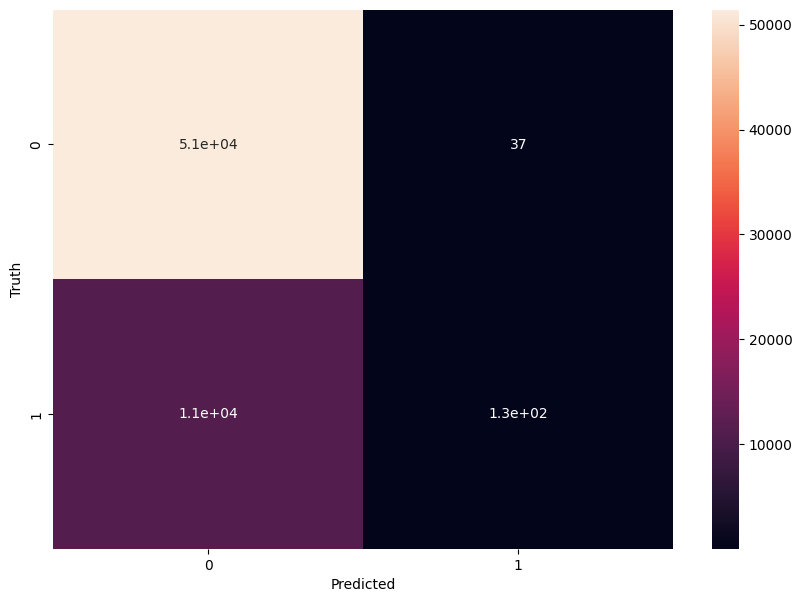

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


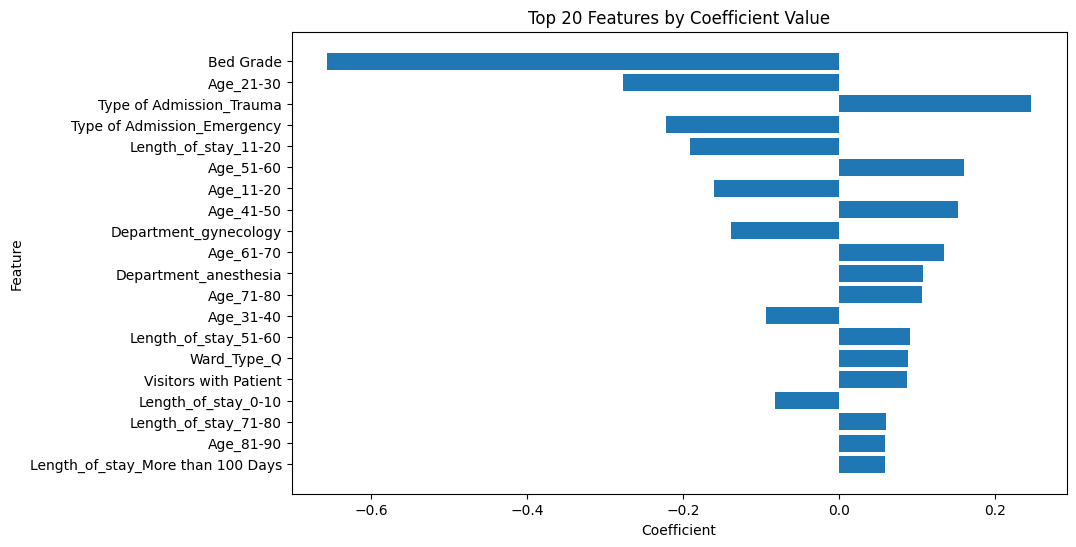

In [13]:
# Get the model coefficients
coefficients_age = logreg.coef_[0]

# Create a dataframe for the coefficients
coef_df_age = pd.DataFrame({'feature': X_train_1.columns, 'coefficient': coefficients_age})

# Sort the dataframe by the absolute value of the coefficients
coef_df_age = coef_df_age.sort_values(by='coefficient', key=abs, ascending=False)

# Display a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df_age['feature'][:20], coef_df_age['coefficient'][:20]) # Display top 20 features
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient Value')
plt.gca().invert_yaxis() # Invert axis to display highest coefficients at the top
plt.show()

In [14]:
# Creating the mapping dictionary
mapping_dict = {
    '0-10': 5,
    '11-20': 15,
    '21-30': 25,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '61-70': 65,
    '71-80': 75,
    '81-90': 85,
    '91-100': 95,
    'More than 100 Days': 105
}
# Using the map function to replace the categories with the corresponding numerical values
df['Length_of_stay'] = df['Length_of_stay'].map(mapping_dict)

In [17]:
# Use pandas' get_dummies function to convert the 'Length_of_stay' column into dummy/indicator variables
los_dummies = pd.get_dummies(df['Length_of_stay']) 
# Now drop the '55' column to use it as the base
los_dummies = los_dummies.drop(55, axis=1)

# Define your logistic regression model
logistic_model_los = LogisticRegression()

# Fit your model
logistic_model_los.fit(los_dummies, df['is_extreme'])

# Get the coefficients (betas)
coefficients_los = logistic_model_los.coef_

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients_los)

# Print out the odds ratios for each age category relative to '21-30'
for category, odds_ratio in zip(los_dummies.columns, odds_ratios[0]):
    print(f"Odds Ratio of {category} relative to '55': {odds_ratio}")

Odds Ratio of 5 relative to '55': 0.5888823006390522
Odds Ratio of 15 relative to '55': 0.5441460845982895
Odds Ratio of 25 relative to '55': 0.7535503743734845
Odds Ratio of 35 relative to '55': 0.7848852725544041
Odds Ratio of 45 relative to '55': 0.8782593712707708
Odds Ratio of 65 relative to '55': 1.0781506446655875
Odds Ratio of 75 relative to '55': 1.176888169336189
Odds Ratio of 85 relative to '55': 1.0472740187641552
Odds Ratio of 95 relative to '55': 1.438101898586575
Odds Ratio of 105 relative to '55': 1.4464226782340577


In [18]:
los_dummies = sm.add_constant(los_dummies)

# Define your logistic regression model
logit_model_los = sm.Logit(df['is_extreme'], los_dummies)

# Fit your model
result_los = logit_model_los.fit()

print(result.summary())

# Get the marginal effects
marg_eff_los = result_los.get_margeff()
print(marg_eff_los.summary())

Optimization terminated successfully.
         Current function value: 0.464586
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:               313793
Model:                          Logit   Df Residuals:                   313783
Method:                           MLE   Df Model:                            9
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                 0.01635
Time:                        21:02:26   Log-Likelihood:            -1.4485e+05
converged:                       True   LL-Null:                   -1.4726e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1488      0.016   -131.882      0.000      -2.181      -2.117
0-10          -0.0008      0.

In [19]:
# Define your confounding variables
los_confounders = df[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit', 'Hospital_code', 'City_Code_Hospital']]

# Use pandas' get_dummies function to convert the 'Length_of_stay' column into dummy/indicator variables
los_dummies = pd.get_dummies(df['Length_of_stay']) 
# Now drop the '55' column to use it as the base
los_dummies = los_dummies.drop(55, axis=1)

# Combine your predictor variables with your confounding variables
X_los = pd.concat([los_dummies, los_confounders], axis=1)
X_los.columns = X_los.columns.astype(str)
# Define your logistic regression model
logistic_model_los_con = LogisticRegression()

# Fit your model
logistic_model_los_con.fit(X_los, df['is_extreme'])

# Get the coefficients (betas)
coefficients_los_con = logistic_model_los_con.coef_

# Exponentiate the coefficients to get the odds ratios
odds_ratios_los_con = np.exp(coefficients_los_con)

# Get the list of age categories from your dummy variables
los_categories = los_dummies.columns

# Print out the odds ratios for each age category relative to '21-30'
for category, odds_ratio in zip(los_dummies.columns, odds_ratios_los_con[0]):
    print(f"Odds Ratio of {category} relative to '55': {odds_ratio}")

Odds Ratio of 5 relative to '55': 0.9999999889384794
Odds Ratio of 15 relative to '55': 0.9999999649791035
Odds Ratio of 25 relative to '55': 0.99999998310879
Odds Ratio of 35 relative to '55': 0.9999999891835099
Odds Ratio of 45 relative to '55': 0.999999998829814
Odds Ratio of 65 relative to '55': 1.000000000205753
Odds Ratio of 75 relative to '55': 1.0000000014328472
Odds Ratio of 85 relative to '55': 0.9999999999405009
Odds Ratio of 95 relative to '55': 1.0000000009779395
Odds Ratio of 105 relative to '55': 1.0000000022392712


In [20]:
# Add a constant to the features matrix
X_los_const = sm.add_constant(X_los)

# Fit a logistic regression model
logit_los = sm.Logit(df['is_extreme'], X_con_const)
result_los = logit_los.fit()

# Compute the marginal effects
marginal_effects_los = result_los.get_margeff()

print(marginal_effects_los.summary())

Optimization terminated successfully.
         Current function value: 0.459289
         Iterations 6
        Logit Marginal Effects       
Dep. Variable:             is_extreme
Method:                          dydx
At:                           overall
                                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
0-10                                 -0.0012      0.006     -0.180      0.857      -0.014       0.011
11-20                                -0.0393      0.005     -8.299      0.000      -0.049      -0.030
31-40                                 0.0705      0.003     24.986      0.000       0.065       0.076
41-50                                 0.1171      0.003     42.762      0.000       0.112       0.122
51-60                                 0.1211      0.003     42.344      0.000       0.115       0.127
61-70                           

In [21]:
# Create a copy of the dataframe
df_copy_los = df.copy()

# One-hot encode the categorical features
categorical_features_los = ['Hospital_type_code', 'City_Code_Hospital','Age', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission']
df_copy_los = pd.get_dummies(df_copy_los, columns=categorical_features_los)

# Display the updated dataframe
df_copy_los.head()

,Unnamed: 0,case_id,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Admission_Deposit,...,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,1,1,8,3,2.0,31397,7.0,Extreme,2,4911,...,0,0,0,0,0,0,1,1,0,0
1,2,2,2,2,2.0,31397,7.0,Extreme,2,5954,...,0,0,0,0,0,0,1,0,1,0
2,3,3,10,2,2.0,31397,7.0,Extreme,2,4745,...,0,0,0,0,0,1,0,0,1,0
3,4,4,26,2,2.0,31397,7.0,Extreme,2,7272,...,0,0,0,0,1,0,0,0,1,0
4,5,5,26,2,2.0,31397,7.0,Extreme,2,5558,...,0,0,0,0,1,0,0,0,1,0


In [22]:
# Prepare the feature matrix X and target vector y
X = df_copy_los.drop(columns=['Severity of Illness','is_extreme','Severity of Illness','is_extreme','Unnamed: 0', 'case_id','patientid'])
y = df_copy_los['is_extreme']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the logistic regression model
logreg_los = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg_los.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = logreg_los.predict(X_test)

# Compute the confusion matrix
cm_los = confusion_matrix(y_test, y_pred)

# Compute and print the classification report
cr_los = classification_report(y_test, y_pred)
print(cr_los)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     51464
           1       0.82      0.03      0.05     11295

    accuracy                           0.82     62759
   macro avg       0.82      0.51      0.48     62759
weighted avg       0.82      0.82      0.75     62759



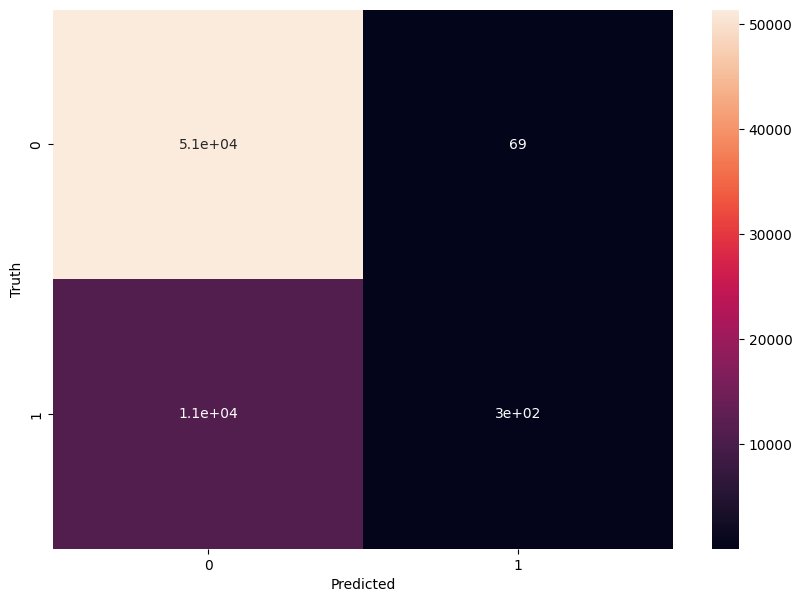

In [23]:
# Create a heatmap from the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_los, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


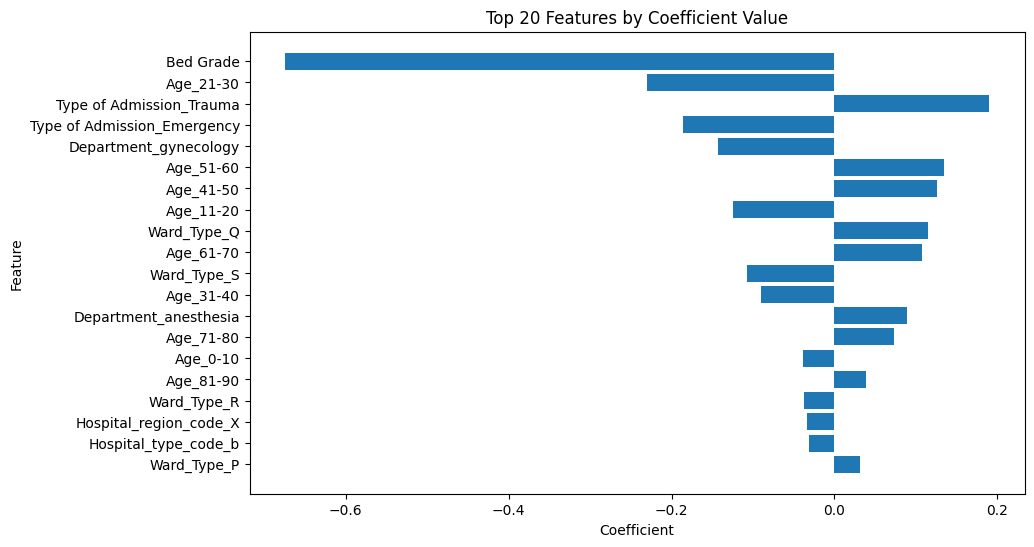

In [24]:
# Get the model coefficients
coefficients_los = logreg_los.coef_[0]

# Create a dataframe for the coefficients
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients_los})

# Sort the dataframe by the absolute value of the coefficients
coef_df = coef_df.sort_values(by='coefficient', key=abs, ascending=False)

# Display a bar plot of the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['feature'][:20], coef_df['coefficient'][:20]) # Display top 20 features
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient Value')
plt.gca().invert_yaxis() # Invert axis to display highest coefficients at the top
plt.show()